# Data Prepare

Time frame: 2020-01-26 to 2020-11-08 by week

In [134]:
# Setup the environment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [135]:
trends_df = pd.read_csv('keywordtrends_byweek_byprovince.csv', sep=',') # Import keyword searching trends data 

In [136]:
trends_df['date'] = pd.to_datetime(trends_df['date']) # Transform 'date' column into datetime type
trends_df.set_index(['geography', 'date'], inplace=True)

In [137]:
# Drop the data which beyond the time frame of covid dataset

for i in [5, 12, 19]:
    trends_df.drop(date(2020,1,i), axis=0, level=1, inplace=True) 
    
trends_df.drop(date(2020,11,15), axis=0, level=1, inplace=True)

In [138]:
trends_df # Take a look at keyword searching trend dataset

Fatigue  Fever  Chills  Cough  Shortness of Breath  \
geography date                                                             
CA        2020-01-26       88     41    45.0     51                 31.0   
          2020-02-02       87     37    44.0     49                 20.0   
          2020-02-09       87     39    54.0     44                 20.0   
          2020-02-16       97     48    46.0     41                 22.0   
          2020-02-23       86     41    56.0     41                 21.0   
...                       ...    ...     ...    ...                  ...   
YT        2020-10-11      100      0     NaN      0                  NaN   
          2020-10-18        0      0     NaN      0                  NaN   
          2020-10-25        0      0     NaN     64                  NaN   
          2020-11-01        0     44     NaN      0                  NaN   
          2020-11-08        0      0     NaN      0                  NaN   

                      Loss of smell  Loss of taste  Sore throat  \
geography date                                                    
CA        2020-01-26            4.0            7.0           28   
          2020-02-02            8.0            0.0           27   
          2020-02-09            6.0            7.0           31   
          2020-02-16            0.0           13.0           27   
          2020-02-23            8.0           18.0           25   
...                             ...            ...          ...   
YT        2020-10-11            NaN            NaN            0   
          2020-10-18            NaN            NaN           80   
          2020-10-25            NaN            NaN            0   
          2020-11-01            NaN            NaN            0   
          2020-11-08            NaN            NaN            0   

                      Difficulty swallowing  Runny nose  ...  \
geography date                                           ...   
CA        2020-01-26                   34.0        28.0  ...   
          2020-02-02                   51.0        21.0  ...   
          2020-02-09                   50.0        22.0  ...   
          2020-02-16                   17.0        19.0  ...   
          2020-02-23                   65.0        26.0  ...   
...                                     ...         ...  ...   
YT        2020-10-11                    NaN         NaN  ...   
          2020-10-18                    NaN         NaN  ...   
          2020-10-25                    NaN         NaN  ...   
          2020-11-01                    NaN         NaN  ...   
          2020-11-08                    NaN         NaN  ...   

                      Extreme Tiredness  Muscle Aches  Tired  Exhausted  \
geography date                                                            
CA        2020-01-26               58.0          38.0     82       59.0   
          2020-02-02               76.0          28.0     86       56.0   
          2020-02-09               38.0          66.0     84       81.0   
          2020-02-16               57.0          47.0     81       60.0   
          2020-02-23                0.0          81.0     81       59.0   
...                                 ...           ...    ...        ...   
YT        2020-10-11                NaN           NaN      0        NaN   
          2020-10-18                NaN           NaN      0        NaN   
          2020-10-25                NaN           NaN     94        NaN   
          2020-11-01                NaN           NaN      0        NaN   
          2020-11-08                NaN           NaN     92        NaN   

                      Sleepy  Barking cough  Can't breath  Winded  \
geography date                                                      
CA        2020-01-26    38.0           69.0          24.0    19.0   
          2020-02-02    41.0           31.0          32.0    56.0   
          2020-02-09    39.0           38.0          24.0    55.0   
       

In [139]:
trends_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 546 entries, ('CA', Timestamp('2020-01-26 00:00:00')) to ('YT', Timestamp('2020-11-08 00:00:00'))
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fatigue                546 non-null    int64  
 1   Fever                  546 non-null    int64  
 2   Chills                 462 non-null    float64
 3   Cough                  546 non-null    int64  
 4   Shortness of Breath    462 non-null    float64
 5   Loss of smell          420 non-null    float64
 6   Loss of taste          420 non-null    float64
 7   Sore throat            546 non-null    int64  
 8   Difficulty swallowing  210 non-null    float64
 9   Runny nose             462 non-null    float64
 10  Congested nose         168 non-null    float64
 11  Headache               546 non-null    int64  
 12  Nausea                 546 non-null    int64  
 13  Vomiting               546 non-nul

As showed above, we have a lot of NaN values in keywords searching trends dataset(trends_df). To process NaN value, I simply fill them with 0 given that 0 means "No searching interest" and NaN values also have similar meaning here.

In [140]:
trends_df.fillna(0, inplace=True) # Fill NaN with 0
trends_df.isnull().any() # Check

Fatigue                  False
Fever                    False
Chills                   False
Cough                    False
Shortness of Breath      False
Loss of smell            False
Loss of taste            False
Sore throat              False
Difficulty swallowing    False
Runny nose               False
Congested nose           False
Headache                 False
Nausea                   False
Vomiting                 False
Diarrhea                 False
Stomach pain             False
Extreme Tiredness        False
Muscle Aches             False
Tired                    False
Exhausted                False
Sleepy                   False
Barking cough            False
Can't breath             False
Winded                   False
Painful Swallowing       False
Stuffy Nose              False
dtype: bool

In [141]:
# Import Covid-19 cases data
covid_df = pd.read_csv('Provincial_Daily_Totals.csv', sep=',', usecols=['Abbreviation', 'DailyTotals', 'SummaryDate'])

In [142]:
# Transform 'SummaryDate' column into datetime type and unify with date column of keyword trends dataset

dates = pd.to_datetime(covid_df['SummaryDate'])

for i in range(len(dates)):
    dates[i] = dates[i].date()
    
covid_df.set_index(dates.rename('date').astype('datetime64[ns]'), inplace=True)
covid_df.drop('SummaryDate', axis=1, inplace=True)

In [143]:
# Drop data where date does not match with searching trends dataset

for i in range(9,14):
    covid_df.drop(date(2020,11,i), axis=0, inplace=True) 
    
covid_df.drop(date(2020,1,25), axis=0, inplace=True)

In [144]:
# Group covid data by province

grouped_covid = covid_df.groupby(['Abbreviation',pd.Grouper(freq='1W')]).sum()
grouped_covid.rename({'DailyTotals':'WeeklyTotals'}, axis=1, inplace=True)
grouped_covid.index.rename(['Province', 'Week'], inplace=True)
grouped_covid

WeeklyTotals
Province Week                    
AB       2020-01-26             0
         2020-02-02             0
         2020-02-09             0
         2020-02-16             0
         2020-02-23             0
...                           ...
YT       2020-10-11             0
         2020-10-18             0
         2020-10-25             5
         2020-11-01             3
         2020-11-08             0

[630 rows x 1 columns]

In [145]:
trends_df.index.rename(['Province', 'Week'], inplace=True) # Unify the index names
trends_df.index.unique(level=0) # Check 'Province' index

Index(['CA', 'BC', 'AB', 'MB', 'ON', 'QC', 'SK', 'NL', 'NB', 'NS', 'PE', 'NT',
       'YT'],
      dtype='object', name='Province')

In [146]:
grouped_covid.index.unique(level=0)

Index(['AB', 'BC', 'CA', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC',
       'RC', 'SK', 'YT'],
      dtype='object', name='Province')

Here we see provinces are not the same due to different data source. To make these two datasets(grouped_covid and trends_df) comparable and ready to be merged, we decide to drop provinces which do not exist in both datasets.

In [147]:
# Drop provinces that do not exist in keyword trending dataset

grouped_covid.drop(['NU', 'RC'], axis=0, level=0, inplace=True)

Now we have trends and covid datasets with same date interval

In [148]:
trends_df.index.unique(level=0)

Index(['CA', 'BC', 'AB', 'MB', 'ON', 'QC', 'SK', 'NL', 'NB', 'NS', 'PE', 'NT',
       'YT'],
      dtype='object', name='Province')

In [149]:
grouped_covid.index.unique(level=0)

Index(['AB', 'BC', 'CA', 'MB', 'NB', 'NL', 'NS', 'NT', 'ON', 'PE', 'QC', 'SK',
       'YT'],
      dtype='object', name='Province')

In [150]:
trends_df

Fatigue  Fever  Chills  Cough  Shortness of Breath  \
Province Week                                                             
CA       2020-01-26       88     41    45.0     51                 31.0   
         2020-02-02       87     37    44.0     49                 20.0   
         2020-02-09       87     39    54.0     44                 20.0   
         2020-02-16       97     48    46.0     41                 22.0   
         2020-02-23       86     41    56.0     41                 21.0   
...                      ...    ...     ...    ...                  ...   
YT       2020-10-11      100      0     0.0      0                  0.0   
         2020-10-18        0      0     0.0      0                  0.0   
         2020-10-25        0      0     0.0     64                  0.0   
         2020-11-01        0     44     0.0      0                  0.0   
         2020-11-08        0      0     0.0      0                  0.0   

                     Loss of smell  Loss of taste  Sore throat  \
Province Week                                                    
CA       2020-01-26            4.0            7.0           28   
         2020-02-02            8.0            0.0           27   
         2020-02-09            6.0            7.0           31   
         2020-02-16            0.0           13.0           27   
         2020-02-23            8.0           18.0           25   
...                            ...            ...          ...   
YT       2020-10-11            0.0            0.0            0   
         2020-10-18            0.0            0.0           80   
         2020-10-25            0.0            0.0            0   
         2020-11-01            0.0            0.0            0   
         2020-11-08            0.0            0.0            0   

                     Difficulty swallowing  Runny nose  ...  \
Province Week                                           ...   
CA       2020-01-26                   34.0        28.0  ...   
         2020-02-02                   51.0        21.0  ...   
         2020-02-09                   50.0        22.0  ...   
         2020-02-16                   17.0        19.0  ...   
         2020-02-23                   65.0        26.0  ...   
...                                    ...         ...  ...   
YT       2020-10-11                    0.0         0.0  ...   
         2020-10-18                    0.0         0.0  ...   
         2020-10-25                    0.0         0.0  ...   
         2020-11-01                    0.0         0.0  ...   
         2020-11-08                    0.0         0.0  ...   

                     Extreme Tiredness  Muscle Aches  Tired  Exhausted  \
Province Week                                                            
CA       2020-01-26               58.0          38.0     82       59.0   
         2020-02-02               76.0          28.0     86       56.0   
         2020-02-09               38.0          66.0     84       81.0   
         2020-02-16               57.0          47.0     81       60.0   
         2020-02-23                0.0          81.0     81       59.0   
...                                ...           ...    ...        ...   
YT       2020-10-11                0.0           0.0      0        0.0   
         2020-10-18                0.0           0.0      0        0.0   
         2020-10-25                0.0           0.0     94        0.0   
         2020-11-01                0.0           0.0      0        0.0   
         2020-11-08                0.0           0.0     92        0.0   

                     Sleepy  Barking cough  Can't breath  Winded  \
Province Week                                                      
CA       2020-01-26    38.0           69.0          24.0    19.0   
         2020-02-02    41.0           31.0          32.0    56.0   
         2020-02-09    39.0           38.0          24.0    55.0   
         2020-02-16    41.0           15.0          32.0    55.

In [152]:
grouped_covid

WeeklyTotals
Province Week                    
AB       2020-01-26             0
         2020-02-02             0
         2020-02-09             0
         2020-02-16             0
         2020-02-23             0
...                           ...
YT       2020-10-11             0
         2020-10-18             0
         2020-10-25             5
         2020-11-01             3
         2020-11-08             0

[546 rows x 1 columns]

In [157]:
df_concat = pd.concat([trends_df, grouped_covid], axis=1) # Combine these two datasets into one for analysis use

# Analysis 1: Using absolute Covid cases without  time lag 

Here we have a dataframe with absolute weekly covid cases without any time lag ready to use: "df_concat"

## Correlations

In [159]:
# Define a function, passing in dataframe and method('pearson' or 'spearman') and return correlation table
# This function will be reused in following analysis

def correlation(dataframe, method):
    corrs = []

    for prov in dataframe.index.get_level_values(0).unique():
        a = dataframe.loc[prov].corr(method=method)['WeeklyTotals'].rename(prov)
        corrs.append(a)

    df_corrs_pearson = pd.concat(corrs, axis=1)
    
    return df_corrs_pearson

In [160]:
# Calculate pearson correlations between weekly covid cases and all keyword trending values

correlation(df_concat, 'pearson')

,AB,BC,CA,MB,NB,NL,NS,NT,ON,PE,QC,SK,YT
Fatigue,-0.134961,0.249513,-0.108444,-0.062214,-0.270718,0.077740,-0.271012,-0.111985,-0.041270,-0.044147,-0.181361,0.112877,-0.099382
Fever,-0.291902,-0.205832,-0.340961,-0.079627,0.131404,0.268091,-0.054188,-0.157729,-0.379084,0.227664,-0.332901,-0.147505,-0.113192
Chills,-0.136929,-0.144676,-0.201255,0.050114,-0.050948,0.066462,-0.034372,NaN,-0.446142,0.019358,-0.133961,0.111537,NaN
Cough,-0.245403,-0.076851,-0.261453,-0.164564,0.136471,0.235505,-0.104788,-0.024594,-0.285278,-0.013471,-0.222906,-0.185019,0.078058
Shortness of Breath,-0.284865,-0.083602,-0.174274,-0.133362,0.153054,0.161973,0.204249,NaN,-0.209031,0.070235,-0.234712,0.098352,NaN
Loss of smell,0.541524,0.155929,0.306816,0.369401,0.010237,-0.028063,-0.005072,NaN,0.186673,NaN,0.164813,-0.183829,NaN
Loss of taste,0.334211,0.119970,0.449816,0.608930,-0.174117,0.290780,0.187527,NaN,0.235427,NaN,-0.078363,-0.060465,NaN
Sore throat,-0.151127,-0.037435,-0.209250,-0.000896,0.296303,-0.040456,0.087936,-0.015302,-0.270600,0.182991,-0.270667,0.018995,0.087170
Difficulty swallowing,0.053822,-0.043369,0.104104,NaN,NaN,NaN,NaN,NaN,0.129151,NaN,0.195996,NaN,NaN
Runny nose,0.078636,0.201225,0.033563,-0.052408,0.118401,0.035119,0.025826,NaN,0.068102,0.028880,-0.263827,0.069465,NaN


In [83]:
# Spearman correlations

correlation(df_concat, 'spearman')

,AB,BC,CA,MB,NB,NL,NS,NT,ON,PE,QC,SK,YT
Fatigue,-0.215573,0.207859,-0.162651,-0.225398,-0.274588,-0.063728,-0.242564,-0.134512,-0.011196,-0.101231,-0.172848,0.068378,-0.070139
Fever,-0.363651,-0.285552,-0.320718,-0.080945,-0.019282,-0.019627,-0.140159,-0.175131,-0.424554,0.126146,-0.417178,-0.321430,-0.127610
Chills,-0.159331,-0.085246,-0.190909,-0.088173,0.049322,0.109254,-0.062316,NaN,-0.425981,-0.051290,-0.136525,0.123723,NaN
Cough,-0.244963,-0.069178,-0.106898,-0.162106,0.077055,0.123253,-0.187294,0.021743,-0.172050,0.127348,-0.203580,-0.216964,0.090653
Shortness of Breath,-0.336190,-0.036992,-0.041337,-0.110085,0.188281,0.179743,0.070964,NaN,0.116521,0.049662,-0.170177,0.111660,NaN
Loss of smell,0.535880,0.386537,0.616933,0.286278,0.219869,0.148149,0.176515,NaN,0.513858,NaN,0.291513,-0.179560,NaN
Loss of taste,0.385713,0.247642,0.493933,0.302715,-0.222681,0.208152,0.259470,NaN,0.501992,NaN,0.037307,0.102786,NaN
Sore throat,-0.050744,0.173303,-0.178103,-0.008510,0.105544,0.089124,-0.026159,0.029445,-0.252705,0.203547,-0.250112,0.135876,0.159708
Difficulty swallowing,0.000685,0.014109,0.070502,NaN,NaN,NaN,NaN,NaN,0.104008,NaN,0.225777,NaN,NaN
Runny nose,0.249036,0.342793,0.124584,0.098877,0.193625,0.056067,-0.062028,NaN,0.142893,0.068352,-0.202939,0.111948,NaN


## OLS Model
By observing above pearson and spearman correlation tables, we found 'Loss of smell', 'Loss of taste' and 'Sleepy' have higher correlation values than other keywords in most provinces.

Using 'Loss of smell', 'Loss of taste', 'Sleepy' as predict variables and 'WeeklyTotals' as response variable to build OLS model.

In [84]:
# Setup environment

from statsmodels.formula.api import ols
import statsmodels.api as sm

In [85]:
# Build OLS model using statsmodels
# This function will be reused in later analysis

def ols_model(dataframe, var_list):
    results = {}
    for prov in dataframe.index.to_frame(index=False).Province.unique():
        Y = dataframe.loc[prov]['WeeklyTotals']
        X = dataframe.loc[prov][var_list]
        X = sm.add_constant(X)
    
        results[prov] = sm.OLS(Y, X).fit()
    
    return results

In [86]:
# Call the ols_model function to get OLS regression result

var_list = ['Loss of smell', 'Loss of taste', 'Sleepy']
ols_results = ols_model(df_concat, var_list)

In [87]:
# Print summary for every province

for key in ols_results:
    print(key)
    print(ols_results[key].summary())
    print('\n')

AB
                            OLS Regression Results                            
Dep. Variable:           WeeklyTotals   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     8.772
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           0.000151
Time:                        10:24:59   Log-Likelihood:                -333.40
No. Observations:                  42   AIC:                             674.8
Df Residuals:                      38   BIC:                             681.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -419.6849    307.737     -1.

C:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


# Analysis 2: Using absolute Covid cases with time lags

With the hyposesis that there might be relationship between symptom keywords searching on google and change in Covid-19 cases, it is reasonable to assume that there might exist time lags between the action of searching online and weekly Covid-19 cases change. Typically we assume people would search keywords 1 or 2 weeks before it may potentially lead to Covid-19 cases change. 

In [88]:
shift_1w = -1 # One week lag time
shift_2w = -2 # Two weeks lag time
df_oneweeklag = df_concat.copy() # Initiate one week lag dataframe
df_twoweeklag = df_concat.copy() # Initiate two week lags dataframe

In [89]:
# Shift WeeklyTotal covid cases up for 1 week and renew the values

for prov in df_oneweeklag.index.get_level_values(0).unique():
    df_oneweeklag.loc[prov, 'WeeklyTotals'] = df_oneweeklag.loc[prov]['WeeklyTotals'].shift(shift_1w).values

# Drop new generated NaN value due to shift

df_oneweeklag.dropna(inplace=True)

In [90]:
# Shift WeeklyTotal covid cases up for 2 weeks and renew the values

for prov in df_twoweeklag.index.get_level_values(0).unique():
    df_twoweeklag.loc[prov, 'WeeklyTotals'] = df_twoweeklag.loc[prov]['WeeklyTotals'].shift(shift_2w).values

# Drop new generated NaN value due to shift

df_twoweeklag.dropna(inplace=True)

Now we have two dataframes with one and two week lags of covid weekly cases ready to use: "df_oneweeklag" and "df_twoweeklag"

Time frame for one week lag dataframe is from 2020-01-26 to 2020-11-01

Time frame for two week lags dataframe is from 2020-01-26 to 2020-10-25 

## Correlations

In [91]:
# Calculate pearson correlations between one week lagged covid cases and all keyword trending values

correlation(df_oneweeklag, 'pearson')

,AB,BC,CA,MB,NB,NL,NS,NT,ON,PE,QC,SK,YT
Fatigue,0.061531,0.163236,-0.226855,-0.128390,-0.203714,-0.035141,-0.266931,-0.115036,-0.206592,-0.137437,-0.216478,-0.002483,-0.057257
Fever,-0.254418,-0.175310,-0.245473,-0.118338,0.117873,0.368826,0.153124,0.073255,-0.285148,0.065160,-0.202788,-0.175939,-0.061764
Chills,0.003235,-0.135783,-0.138680,-0.190379,0.318993,0.184423,0.026311,NaN,-0.334746,-0.113649,-0.046164,0.199826,NaN
Cough,-0.181395,-0.053642,-0.177666,-0.168734,0.278657,0.426735,0.065602,-0.038452,-0.200363,0.249804,-0.104119,-0.198128,-0.028936
Shortness of Breath,-0.232530,-0.014940,-0.076906,-0.216024,0.057166,0.160858,0.135833,NaN,-0.081950,-0.193682,-0.132447,0.168761,NaN
Loss of smell,0.461542,0.155448,0.355526,0.172522,-0.015970,-0.008586,0.182114,NaN,0.218336,NaN,0.306080,-0.171693,NaN
Loss of taste,0.492253,0.207028,0.482974,0.242170,-0.165283,0.037198,0.141410,NaN,0.295393,NaN,0.082709,-0.016095,NaN
Sore throat,-0.161453,0.053983,-0.094360,0.037061,0.427804,0.387655,0.269575,-0.145308,-0.155407,0.147657,-0.109860,0.027764,0.330534
Difficulty swallowing,0.078222,0.021431,0.113549,NaN,NaN,NaN,NaN,NaN,0.256911,NaN,0.199199,NaN,NaN
Runny nose,0.133433,0.252330,0.183649,-0.000418,0.010761,0.174747,0.174774,NaN,0.216535,0.090139,-0.106983,0.101115,NaN


In [92]:
# Spearman correlations for one week lagged data

correlation(df_oneweeklag, 'spearman')

,AB,BC,CA,MB,NB,NL,NS,NT,ON,PE,QC,SK,YT
Fatigue,-0.052912,0.145597,-0.186587,-0.198873,-0.274390,-0.110290,-0.227606,-0.138215,-0.120743,-0.070534,-0.205328,0.021413,-0.054062
Fever,-0.317376,-0.268477,-0.157875,-0.064635,0.086217,0.261146,-0.026414,0.043639,-0.293717,0.066430,-0.265698,-0.319061,-0.006981
Chills,-0.068007,-0.056331,-0.142546,-0.155774,0.059824,0.045201,-0.165081,NaN,-0.320527,-0.265403,-0.017024,0.217310,NaN
Cough,-0.202933,-0.037102,0.009646,-0.124896,0.201316,0.269591,-0.194176,0.012677,-0.061895,0.203788,-0.101265,-0.204508,-0.007579
Shortness of Breath,-0.288034,0.093930,0.036227,-0.082614,-0.025100,0.293164,0.076846,NaN,0.242793,-0.166032,-0.138048,0.273639,NaN
Loss of smell,0.474684,0.347137,0.718305,0.172115,0.132240,0.202086,0.203036,NaN,0.574901,NaN,0.315134,-0.123108,NaN
Loss of taste,0.487661,0.350430,0.579403,0.297366,-0.139587,0.052564,0.060486,NaN,0.559390,NaN,0.166132,0.129446,NaN
Sore throat,0.039717,0.281501,-0.037780,0.095871,0.304601,0.239589,0.033863,-0.181709,-0.076224,0.089895,-0.075015,0.218685,0.306406
Difficulty swallowing,-0.036666,-0.015560,0.073570,NaN,NaN,NaN,NaN,NaN,0.201675,NaN,0.207898,NaN,NaN
Runny nose,0.298757,0.390992,0.276017,0.253236,0.245941,0.323184,0.148238,NaN,0.254829,0.195072,-0.086365,0.156748,NaN


In [93]:
# Pearson correlations for two weeks lagged data

correlation(df_twoweeklag, 'pearson')

,AB,BC,CA,MB,NB,NL,NS,NT,ON,PE,QC,SK,YT
Fatigue,0.259268,0.213112,-0.016251,-0.024099,-0.254564,-0.025771,-0.260441,-0.118258,-0.021562,-0.176164,-0.204940,0.071650,0.152432
Fever,-0.177784,-0.115106,-0.093409,-0.114142,0.228587,0.327860,0.373523,0.035440,-0.140321,0.263241,0.004098,-0.131163,0.048117
Chills,0.126900,-0.030312,-0.011512,-0.107691,0.254864,0.444364,0.038344,NaN,-0.202982,0.027140,0.024557,0.195190,NaN
Cough,-0.136883,-0.005327,-0.050425,-0.168807,0.322317,0.724266,0.283670,0.058970,-0.073293,0.134154,0.049931,-0.102280,-0.125161
Shortness of Breath,-0.144690,-0.025945,0.050325,-0.241667,0.034870,0.175361,0.167813,NaN,0.063272,0.097016,0.057449,0.319856,NaN
Loss of smell,0.354686,0.136976,0.372987,0.033907,0.035929,-0.016766,0.307196,NaN,0.370047,NaN,0.419237,-0.130846,NaN
Loss of taste,0.392359,0.328526,0.510238,0.091471,-0.187128,-0.002421,-0.015654,NaN,0.433540,NaN,0.161661,0.092600,NaN
Sore throat,-0.082592,0.044391,0.077521,-0.117179,0.434430,0.355753,0.525334,0.531143,0.014208,0.239636,0.151516,0.025458,0.075438
Difficulty swallowing,-0.155062,0.150928,0.178788,NaN,NaN,NaN,NaN,NaN,0.217031,NaN,0.195396,NaN,NaN
Runny nose,0.176029,0.319697,0.357642,0.044130,0.340184,0.510296,0.415003,NaN,0.362715,0.479251,0.073715,0.064744,NaN


In [94]:
# Spearman correlations for two week lagged data

correlation(df_twoweeklag, 'spearman')

,AB,BC,CA,MB,NB,NL,NS,NT,ON,PE,QC,SK,YT
Fatigue,0.039681,0.073226,-0.075608,-0.121778,-0.199728,-0.279094,-0.123742,-0.142126,-0.054241,-0.120035,-0.201211,-0.006539,0.018399
Fever,-0.213876,-0.213198,0.025030,-0.076891,-0.020917,0.193309,0.186274,0.150795,-0.158989,0.144608,-0.083870,-0.206713,0.090379
Chills,0.106321,0.033099,-0.031861,-0.160727,0.112583,0.262631,-0.180850,NaN,-0.172302,-0.048545,0.067482,0.208742,NaN
Cough,-0.133512,0.006487,0.114799,-0.066638,0.273112,0.344698,-0.021984,0.073925,0.031566,0.184251,0.006386,-0.133010,-0.059229
Shortness of Breath,-0.206999,0.083494,0.145732,-0.087438,0.202674,0.265189,0.233742,NaN,0.339080,0.040624,0.004413,0.426714,NaN
Loss of smell,0.294899,0.304259,0.709127,0.072089,0.162275,0.180488,0.231462,NaN,0.633933,NaN,0.368047,-0.088487,NaN
Loss of taste,0.496321,0.354869,0.618727,0.337829,-0.270354,0.182242,-0.064679,NaN,0.548201,NaN,0.158102,0.175673,NaN
Sore throat,0.098321,0.329136,0.135768,0.163568,0.284687,0.191412,0.156375,0.275185,0.065801,0.041850,0.140493,0.306521,0.073114
Difficulty swallowing,-0.114908,-0.041628,0.162662,NaN,NaN,NaN,NaN,NaN,0.139134,NaN,0.214743,NaN,NaN
Runny nose,0.377084,0.434992,0.421448,0.373500,0.426208,0.326857,0.283888,NaN,0.371484,0.279937,0.046400,0.232547,NaN


## OLS Regression Model

Here we use 'Loss of smell', 'Loss of taste' and 'Sleepy' for the same reason as we did for "df_concat" to build OLS regression model.

In [95]:
# Call the ols_model function and get OLS regression result for ONE week lagged Covid cases

var_list = ['Loss of smell', 'Loss of taste', 'Sleepy']
ols_results = ols_model(df_oneweeklag, var_list)

In [96]:
# Print summary for every province

for key in ols_results:
    print(key)
    print(ols_results[key].summary())
    print('\n')

AB
                            OLS Regression Results                            
Dep. Variable:           WeeklyTotals   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     11.70
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           1.55e-05
Time:                        10:24:59   Log-Likelihood:                -322.70
No. Observations:                  41   AIC:                             653.4
Df Residuals:                      37   BIC:                             660.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -629.6321    288.552     -2.

C:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [97]:
# Call the ols_model function and get OLS regression result for TWO weeks lagged Covid cases

var_list = ['Loss of smell', 'Loss of taste', 'Sleepy']
ols_results = ols_model(df_twoweeklag, var_list)

In [98]:
# Print summary for every province

for key in ols_results:
    print(key)
    print(ols_results[key].summary())
    print('\n')

AB
                            OLS Regression Results                            
Dep. Variable:           WeeklyTotals   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     7.270
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           0.000620
Time:                        10:24:59   Log-Likelihood:                -318.80
No. Observations:                  40   AIC:                             645.6
Df Residuals:                      36   BIC:                             652.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -563.1845    334.175     -1.

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


YT
                            OLS Regression Results                            
Dep. Variable:           WeeklyTotals   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 13 Dec 2020   Prob (F-statistic):                nan
Time:                        10:24:59   Log-Likelihood:                -60.310
No. Observations:                  40   AIC:                             122.6
Df Residuals:                      39   BIC:                             124.3
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

# Analysis 3: Using weekly change rate of Covid cases without time lag

Here we engineer a new attribute: weekly change rate of Covid cases. It can provide more comprehensive information using both absolute value of Covid cases representing the scale of epidemic and change rate representing trend of epidemic.

In [99]:
df_changerate = df_concat.copy() # Initiate weekly percentage change dataframe

# Calculate weekly percentage change of Covid cases, filling NaN and inf with 0

df_changerate['WeeklyTotals'] = df_changerate['WeeklyTotals'].pct_change(periods=1,fill_method='bfill').replace(np.inf, 0).fillna(0)

In [100]:
df_changerate.loc['AB']['WeeklyTotals'] # Inspection on province 'AB'

Week
2020-01-26     0.000000
2020-02-02     0.000000
2020-02-09     0.000000
2020-02-16     0.000000
2020-02-23     0.000000
2020-03-01     0.000000
2020-03-08     0.000000
2020-03-15    12.000000
2020-03-22     2.903846
2020-03-29     0.980296
2020-04-05     0.465174
2020-04-12    -0.319185
2020-04-19     1.872818
2020-04-26     0.455729
2020-05-03    -0.237925
2020-05-10    -0.618936
2020-05-17    -0.156057
2020-05-24    -0.523114
2020-05-31    -0.234694
2020-06-07    -0.146667
2020-06-14     1.304688
2020-06-21    -0.081356
2020-06-28     0.077491
2020-07-05    -0.099315
2020-07-12     0.281369
2020-07-19     0.848665
2020-07-26     0.391653
2020-08-02    -0.126874
2020-08-09    -0.224571
2020-08-16     0.061329
2020-08-23     0.115570
2020-08-30     0.047482
2020-09-06     0.370879
2020-09-13    -0.057114
2020-09-20     0.026567
2020-09-27    -0.004141
2020-10-04     0.054054
2020-10-11     0.615385
2020-10-18     0.086691
2020-10-25     0.396629
2020-11-01     0.368866
2020-11-08 

Now we have a dataframe with weekly percentage change of Covid cases ready to use: "df_changerate"

In [101]:
# Calculate pearson correlations between weekly percentage change of Covid cases and all keyword searching trends

correlation(df_changerate, 'pearson')

,AB,BC,CA,MB,NB,NL,NS,NT,ON,PE,QC,SK,YT
Fatigue,0.012075,-0.183124,-0.224920,-0.161377,-0.216874,-0.163600,-0.171823,0.147917,0.165834,-0.130686,-0.278389,-0.113003,-0.079730
Fever,0.772335,0.571469,0.709677,-0.016477,0.026173,0.324725,0.354518,-0.028886,0.492235,0.392815,0.729086,0.147392,-0.019031
Chills,0.393526,0.484442,0.752380,0.141577,-0.107950,0.111641,0.046751,NaN,0.234863,-0.059979,0.061205,0.045787,NaN
Cough,0.528735,0.567464,0.719972,0.090166,-0.133480,0.362184,0.361236,0.055112,0.531702,-0.038627,0.610629,0.201474,0.075953
Shortness of Breath,0.555372,0.548883,0.626522,-0.013884,0.048076,0.177697,-0.087443,NaN,0.441746,0.036328,0.762803,-0.103557,NaN
Loss of smell,0.117485,0.335731,0.248308,-0.074361,0.026398,0.089711,0.819167,NaN,0.023083,NaN,0.194311,0.013051,NaN
Loss of taste,0.257965,0.102241,0.225588,-0.008837,-0.065233,-0.051740,-0.069385,NaN,0.012229,NaN,0.129792,0.112119,NaN
Sore throat,0.766479,0.632463,0.741764,0.022804,0.251030,0.058959,0.396716,0.186658,0.499513,0.046498,0.637225,0.407323,0.005928
Difficulty swallowing,-0.200282,0.086966,0.002893,NaN,NaN,NaN,NaN,NaN,-0.028208,NaN,-0.087603,NaN,NaN
Runny nose,0.684207,0.440295,0.578723,0.068880,0.114559,0.118357,0.280767,NaN,0.338798,0.080555,0.292579,-0.018620,NaN


In [102]:
# Spearman correlations

correlation(df_changerate, 'spearman')

,AB,BC,CA,MB,NB,NL,NS,NT,ON,PE,QC,SK,YT
Fatigue,0.142370,0.041194,-0.133934,-0.230031,-0.069950,-0.172701,-0.238101,0.149279,0.122860,-0.113731,-0.258008,-0.016105,-0.076162
Fever,0.295910,-0.041943,0.563126,0.064014,0.380302,0.125855,0.376954,-0.028115,0.460712,0.488826,0.561225,-0.041931,0.021021
Chills,0.158810,0.169620,0.403978,0.095637,-0.028430,0.017820,0.226285,NaN,0.171043,0.011533,0.382879,0.185198,NaN
Cough,0.127582,0.170571,0.513866,0.162536,0.160611,0.206812,0.437368,0.084130,0.455435,0.010169,0.518884,0.102281,0.055106
Shortness of Breath,0.153415,0.261184,0.185813,-0.190423,0.067904,0.265571,-0.099847,NaN,0.275100,0.087480,0.339424,-0.065146,NaN
Loss of smell,0.417182,0.057049,0.318527,0.115397,0.154333,0.244067,0.267650,NaN,0.304057,NaN,0.152459,-0.247329,NaN
Loss of taste,0.320027,0.200606,0.259569,0.109552,-0.042749,-0.041945,-0.013429,NaN,0.300464,NaN,0.040570,0.148809,NaN
Sore throat,0.222512,0.274653,0.587367,0.140353,0.053008,0.018177,0.186216,0.196067,0.522367,0.108129,0.450890,0.173326,0.009009
Difficulty swallowing,-0.357574,-0.122869,0.192370,NaN,NaN,NaN,NaN,NaN,0.076037,NaN,0.146831,NaN,NaN
Runny nose,0.351307,0.262056,0.749291,0.149968,0.166818,0.060698,0.179210,NaN,0.617888,0.108777,0.304268,0.134794,NaN


## OLS Regression Model

Here we use 'Fever', 'Cough', 'Shortness of Breath' and 'Sore throat' as predict variables since they all performed correlations around 0.7 in pearson correlation table.

In [103]:
# Call the ols_model function and get OLS regression result

var_list = ['Fever', 'Cough', 'Shortness of Breath', 'Sore throat']
ols_results = ols_model(df_changerate, var_list)

In [104]:
# Print summary for every province

for key in ols_results:
    print(key)
    print(ols_results[key].summary())
    print('\n')

AB
                            OLS Regression Results                            
Dep. Variable:           WeeklyTotals   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     19.37
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           1.14e-08
Time:                        10:25:00   Log-Likelihood:                -62.785
No. Observations:                  42   AIC:                             135.6
Df Residuals:                      37   BIC:                             144.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.8501 

C:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


# Analysis 4: Using weekly change rate of Covid cases with time lags

Analysis below is very similar as analysis with absolute Covid cases with lags but using change rate of Covid cases for each dataset.

In [105]:
shift_1w = -1 # One week lag time
shift_2w = -2 # Two weeks lag time
df_changerate_oneweeklag = df_changerate.copy() # Initiate one week lag dataframe with change rate of Covid cases
df_changerate_twoweeklag = df_changerate.copy() # Initiate two weeks lag dataframe

In [106]:
# Shift WeeklyTotal covid cases up for 1 week and renew the values

for prov in df_changerate_oneweeklag.index.get_level_values(0).unique():
    df_changerate_oneweeklag.loc[prov, 'WeeklyTotals'] = df_changerate_oneweeklag.loc[prov]['WeeklyTotals'].shift(shift_1w).values

# Drop new generated NaN value due to shift

df_changerate_oneweeklag.dropna(inplace=True)

In [107]:
# Shift WeeklyTotal covid cases up for 2 weeks and renew the values

for prov in df_changerate_twoweeklag.index.get_level_values(0).unique():
    df_changerate_twoweeklag.loc[prov, 'WeeklyTotals'] = df_changerate_twoweeklag.loc[prov]['WeeklyTotals'].shift(shift_2w).values

# Drop new generated NaN value due to shift

df_changerate_twoweeklag.dropna(inplace=True)

## Correlations

In [108]:
# Calculate pearson correlations for one week lag dataset

correlation(df_changerate_oneweeklag, 'pearson')

,AB,BC,CA,MB,NB,NL,NS,NT,ON,PE,QC,SK,YT
Fatigue,0.257471,0.072127,-0.034513,0.192566,-0.178781,-0.030666,-0.115820,0.136697,-0.183858,-0.075662,-0.110018,-0.066701,0.296178
Fever,0.533467,0.527892,0.666292,0.010714,-0.102570,0.308334,0.616064,0.124909,0.383035,0.088139,0.627795,0.376522,0.215893
Chills,0.370434,0.347428,0.652506,0.139401,0.136524,0.218476,-0.174970,NaN,0.358607,-0.043370,0.097843,0.070353,NaN
Cough,0.544122,0.559514,0.662707,0.045083,0.109984,0.524294,0.535683,-0.013967,0.405800,0.233928,0.637801,0.005842,-0.155048
Shortness of Breath,0.258574,0.340480,0.399348,-0.059572,-0.155624,0.150827,0.244666,NaN,0.237750,-0.292911,0.536050,0.303841,NaN
Loss of smell,-0.139614,-0.229395,0.128729,0.110094,-0.040088,0.029189,0.296780,NaN,0.049940,NaN,0.450305,-0.007769,NaN
Loss of taste,0.082495,0.203920,0.067228,0.117980,-0.051932,-0.114407,-0.167075,NaN,0.164020,NaN,0.251736,0.172074,NaN
Sore throat,0.420413,0.481858,0.551208,0.082794,0.156514,0.530464,0.698444,-0.167647,0.389588,0.263874,0.674043,0.383483,0.219970
Difficulty swallowing,0.025413,-0.084503,-0.015339,NaN,NaN,NaN,NaN,NaN,-0.047995,NaN,-0.071732,NaN,NaN
Runny nose,0.416385,0.424386,0.482943,0.102133,-0.103549,0.425330,0.663465,NaN,0.219537,0.144619,0.483925,0.239400,NaN


In [109]:
# Spearman correlations for one week lag dataset

correlation(df_changerate_oneweeklag, 'spearman')

,AB,BC,CA,MB,NB,NL,NS,NT,ON,PE,QC,SK,YT
Fatigue,0.321505,0.074489,0.262548,0.101763,0.115054,0.055995,-0.101445,0.138215,-0.145661,-0.048207,0.034462,-0.048017,0.284517
Fever,0.143488,-0.028852,0.592162,0.102079,0.295435,0.325267,0.517326,0.154823,0.400022,-0.002116,0.530491,-0.060049,0.233248
Chills,0.430598,0.023628,0.422314,-0.022370,0.105158,-0.122670,-0.064807,NaN,0.371685,-0.094858,0.252430,0.094116,NaN
Cough,0.267395,0.136037,0.506636,0.092959,0.256602,0.358223,0.355477,-0.017157,0.415042,0.217990,0.375480,0.009966,-0.242093
Shortness of Breath,0.153231,0.298932,0.031688,-0.057922,-0.130435,0.176361,-0.009422,NaN,0.149874,-0.319668,0.261211,0.338413,NaN
Loss of smell,0.081937,0.048921,0.152820,0.113153,0.044306,0.225483,0.257420,NaN,0.100752,NaN,0.035150,0.110408,NaN
Loss of taste,0.355725,0.151419,0.192494,0.158786,-0.030113,-0.313444,-0.298085,NaN,0.165088,NaN,0.114624,0.063064,NaN
Sore throat,0.284877,0.233652,0.557174,0.160506,0.323867,0.348585,0.266422,-0.046979,0.508986,0.154623,0.506291,0.075437,0.171902
Difficulty swallowing,-0.228669,-0.115054,0.038703,NaN,NaN,NaN,NaN,NaN,0.115308,NaN,0.172250,NaN,NaN
Runny nose,0.413863,0.189230,0.681301,0.238396,-0.036217,0.346732,0.359674,NaN,0.556738,0.016048,0.337755,0.053349,NaN


In [110]:
# Pearson correlations for two weeks lag dataset

correlation(df_changerate_twoweeklag, 'pearson')

,AB,BC,CA,MB,NB,NL,NS,NT,ON,PE,QC,SK,YT
Fatigue,0.295788,-0.243705,0.202552,-0.042042,-0.081248,-0.114995,0.067933,0.140595,0.017892,-0.148313,0.105725,-0.134590,0.002925
Fever,0.169479,0.310450,0.547456,0.093766,-0.089738,0.233403,0.502891,-0.011478,0.368961,0.179354,0.631042,0.063008,0.081142
Chills,-0.059173,0.407576,0.482902,-0.032676,-0.105851,0.364221,0.045980,NaN,0.210202,0.026039,-0.063072,0.127019,NaN
Cough,0.229747,0.320242,0.524123,0.133346,0.033371,0.602320,0.364802,-0.010773,0.330927,0.073351,0.569572,0.021926,-0.080826
Shortness of Breath,0.044393,0.047801,0.164729,0.237716,0.125911,0.232364,0.007822,NaN,0.121367,0.483750,0.406102,0.229685,NaN
Loss of smell,-0.008913,-0.052151,-0.186324,-0.122956,-0.020536,-0.040154,0.034824,NaN,-0.099983,NaN,-0.068531,0.190640,NaN
Loss of taste,0.028908,-0.142725,-0.100984,0.065283,-0.070728,-0.057942,-0.165164,NaN,-0.085250,NaN,-0.224990,-0.062586,NaN
Sore throat,0.094172,0.166245,0.365243,0.198770,-0.052262,0.064962,0.305385,0.177777,0.229854,0.085677,0.568760,0.071615,-0.194624
Difficulty swallowing,0.347223,-0.112911,-0.251277,NaN,NaN,NaN,NaN,NaN,-0.199630,NaN,-0.110421,NaN,NaN
Runny nose,0.044479,0.110736,0.270724,0.207560,0.159159,0.362474,0.221734,NaN,0.085125,0.254069,0.263957,0.014272,NaN


In [111]:
# Spearman correlations for two weeks lag dataset

correlation(df_changerate_twoweeklag, 'spearman')

,AB,BC,CA,MB,NB,NL,NS,NT,ON,PE,QC,SK,YT
Fatigue,0.297660,0.003943,0.334649,0.189970,0.089346,-0.066982,0.045321,0.142126,0.051987,-0.111972,-0.012632,0.003059,0.051366
Fever,0.198166,0.006110,0.537476,0.102146,0.043457,0.035173,0.467002,-0.020307,0.304914,0.171038,0.493817,-0.044273,0.157396
Chills,0.364294,0.038214,0.411091,-0.052088,0.060817,0.260028,0.073097,NaN,0.168780,0.168698,0.324090,0.051381,NaN
Cough,0.310296,0.188015,0.413032,0.109890,0.203451,0.273152,0.449531,-0.015036,0.348490,0.092943,0.412870,-0.067030,-0.054202
Shortness of Breath,-0.001128,0.057757,-0.122415,0.009209,0.127154,0.015483,-0.074053,NaN,-0.000705,0.414146,0.245598,0.393028,NaN
Loss of smell,-0.246317,-0.147361,-0.159410,-0.175992,0.012894,-0.112616,0.161399,NaN,-0.119186,NaN,-0.045131,-0.072781,NaN
Loss of taste,0.195677,-0.055581,0.025005,0.120362,-0.197933,-0.066264,-0.301585,NaN,-0.162607,NaN,-0.120939,0.065946,NaN
Sore throat,0.172453,0.142267,0.442021,0.161470,0.018142,0.079347,0.257834,0.187042,0.321474,0.029563,0.463739,0.067212,-0.196972
Difficulty swallowing,0.034678,-0.142245,-0.040548,NaN,NaN,NaN,NaN,NaN,-0.169187,NaN,-0.097029,NaN,NaN
Runny nose,0.250305,0.154830,0.530191,0.319094,0.319509,0.077289,0.222545,NaN,0.400426,0.143895,0.225396,0.180158,NaN


## OLS Regression Model

Here we use 'Fever', 'Cough' and 'Sore throat' as predict variables because they generally outperform other keywords in term of correlation to the Covid cases change rate for one week lagged data. 

No regression model will be built for two weeks lagged data since there is no significant correlation for any keywords showed above.

In [112]:
# Call the ols_model function and get OLS regression result for ONE week lag Covid cases

var_list = ['Fever', 'Cough', 'Sore throat']
ols_results = ols_model(df_changerate_oneweeklag, var_list)

In [113]:
# Print summary for every province

for key in ols_results:
    print(key)
    print(ols_results[key].summary())
    print('\n')

AB
                            OLS Regression Results                            
Dep. Variable:           WeeklyTotals   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     6.035
Date:                Sun, 13 Dec 2020   Prob (F-statistic):            0.00188
Time:                        10:25:00   Log-Likelihood:                -76.736
No. Observations:                  41   AIC:                             161.5
Df Residuals:                      37   BIC:                             168.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.3538      0.614     -2.204   

# Time plot for country of Covid cases and keyword searches vs time

A short time plot to see the basic pattern of Covid cases and some keywords as example over time for the whole country.

In [114]:
# Covid weekly totals counts for CA

df_weekly_covid = grouped_covid.reset_index()
df_weekly_covid_CA = df_weekly_covid[df_weekly_covid['Province'] == 'CA'].reset_index().drop(columns = ['index', 'Province'])

In [115]:
# Keyword searches for CA 

df_keywords = trends_df.reset_index()
df_keywords_CA = df_keywords[df_keywords['Province'] == 'CA'].reset_index().drop(columns = ['index', 'Province'])

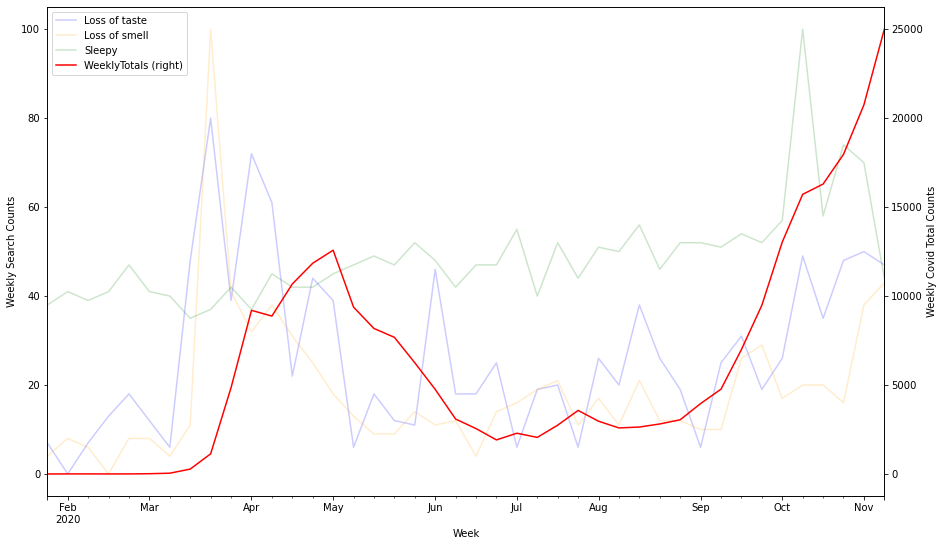

In [116]:
# Plot the lines with keywords 'Loss of taste', 'Loss of smell' and 'Sleepy' which were used in the analysis 1 & 2

df = df_keywords_CA.merge(df_weekly_covid_CA)
df

ax1 = df.plot(
    x = 'Week',
    y = ['Loss of taste', 'Loss of smell', 'Sleepy'],
    color = ['blue', 'orange', 'green'],
    alpha = 0.2,    # brightness of word search lines
    figsize = (15,9)
)
ax1.set(xlabel = 'Week', ylabel = 'Weekly Search Counts')

ax2 = df.plot(
    x = 'Week',
    y = 'WeeklyTotals',
    secondary_y = True,
    ax = ax1,
    color = 'r'
)
ax2.set(ylabel = 'Weekly Covid Total Counts')

plt.savefig('Covid_keyword_plot1.png')

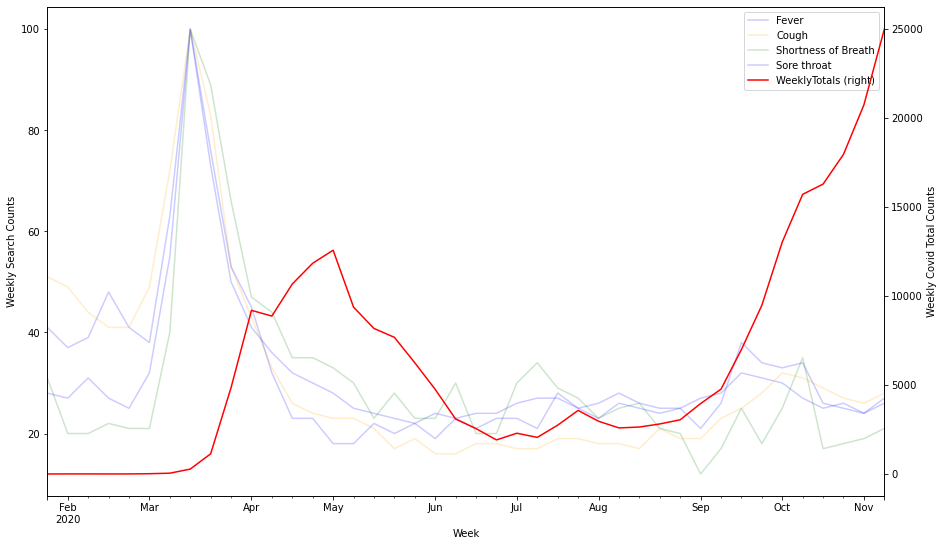

In [117]:
# Plot the lines with keywords 'Fever', 'Cough', 'Shortness of Breath' and 'Sore throat' which were fully or partly used-
# -in the analysis 3 & 4

df = df_keywords_CA.merge(df_weekly_covid_CA)
df

ax1 = df.plot(
    x = 'Week',
    y = ['Fever', 'Cough', 'Shortness of Breath', 'Sore throat'],
    color = ['blue', 'orange', 'green'],
    alpha = 0.2,    # brightness of word search lines
    figsize = (15,9)
)
ax1.set(xlabel = 'Week', ylabel = 'Weekly Search Counts')

ax2 = df.plot(
    x = 'Week',
    y = 'WeeklyTotals',
    secondary_y = True,
    ax = ax1,
    color = 'r'
)
ax2.set(ylabel = 'Weekly Covid Total Counts')

plt.savefig('Covid_keyword_plot2.png')